<a href="https://colab.research.google.com/github/Mefoolyhi/JokeGenieBot/blob/main/jokes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Работа с данными

In [ ]:
import pandas as pd

with open('anek_djvu.txt') as f:
    corpus = f.read().split('<|startoftext|>')
print(corpus[6])
df = pd.DataFrame(corpus, columns=['joke'])
df.to_csv('data.csv', index=False)

Если тебя посещают мысли о смерти - это еще полбеды. Беда - это когда смерть посещают мысли о тебе...




In [ ]:
d = pd.read_csv('data.csv')
d.head(3)

,joke
0,NaN
1,"Только заметил, что слово ""п@рно"" набирается с..."
2,"Друзья мои, чтобы соответствовать вам, я готов..."


In [ ]:
d = d.iloc[1:]
d.shape

(124155, 1)

In [ ]:
d['joke'].iloc[124154]

'На моих глазах как-то две девушки затаскивали кавказца в машину. Они худенькие, а он здоровый такой, никак не хотел в машину лезть. Они попросили у меня помощи, сказали, что собаку надо в ветклинику отвезти.\n\n'

In [ ]:
d['joke'] = d['joke'].str.replace(' - ', ' — ')
d['joke'] = d['joke'].str.replace('- ', '\n- ')
d['joke'] = d['joke'].str.strip('\n')
d['joke'].iloc[124154]

'На моих глазах как-то две девушки затаскивали кавказца в машину. Они худенькие, а он здоровый такой, никак не хотел в машину лезть. Они попросили у меня помощи, сказали, что собаку надо в ветклинику отвезти.'

In [ ]:
d.head(3)

,joke
1,"Только заметил, что слово ""п@рно"" набирается с..."
2,"Друзья мои, чтобы соответствовать вам, я готов..."
3,"- Люся, ты все еще хранишь мой подарок?\n- Да...."


In [ ]:
d.tail(3)

,joke
124153,На чемпионат мира по футболу от России нужно Ю...
124154,В целях профилактики от всего весной следует е...
124155,На моих глазах как-то две девушки затаскивали ...


In [ ]:
import json


with open('jokes_dialog_dataset.json') as f:
    j = json.load(f)
df = pd.json_normalize(j)
idx = df.groupby(['src_hash'])['reply_num'].transform(max) == df['reply_num']
df = df[idx]
df['joke'] = df['context'] + '\n- ' + df['utterance']
df['joke'].to_csv('data1.csv', index=False)

In [ ]:
d1 = pd.read_csv('data1.csv')
d1.head(3)

,joke
0,"- Ты верующий?\n- Частично.\n- В смысле, в бог..."
1,"В ресторане. Посетитель жалуется официанту, чт..."
2,Разговаривают две подруги.\n- Как у тебя насче...


In [ ]:
d1.shape

(49325, 1)

In [ ]:
d1.head(3)

,joke
0,"- Ты верующий?\n- Частично.\n- В смысле, в бог..."
1,"В ресторане. Посетитель жалуется официанту, чт..."
2,Разговаривают две подруги.\n- Как у тебя насче...


In [ ]:
d1.tail(3)

,joke
49322,"Две старушки.\n- Никитична, у тебя какое миним..."
49323,"- Ты опять был у своей шлюхи?\n- Дорогая, надо..."
49324,Американский гангстер почувствовал приближение...


In [ ]:
data = pd.concat([d, d1], ignore_index=True)
data.tail(3)

,joke
173477,"Две старушки.\n- Никитична, у тебя какое миним..."
173478,"- Ты опять был у своей шлюхи?\n- Дорогая, надо..."
173479,Американский гангстер почувствовал приближение...


In [ ]:
data.to_csv('total_data_jokes.csv', index=False)

In [ ]:
total_data = pd.read_csv('total_data_jokes.csv')
total_data

,joke
0,"Только заметил, что слово ""п@рно"" набирается с..."
1,"Друзья мои, чтобы соответствовать вам, я готов..."
2,"- Люся, ты все еще хранишь мой подарок?\n- Да...."
3,"- А вот скажи честно, ты во сне храпишь?\n- По..."
4,"Поссорилась с мужем. Пока он спал, я мысленно ..."
...,...
173475,- Мы на острове! Надо выбираться! Давайте пере...
173476,"- Здравствуйте, а где вход на нудистский пляж?..."
173477,"Две старушки.\n- Никитична, у тебя какое миним..."
173478,"- Ты опять был у своей шлюхи?\n- Дорогая, надо..."


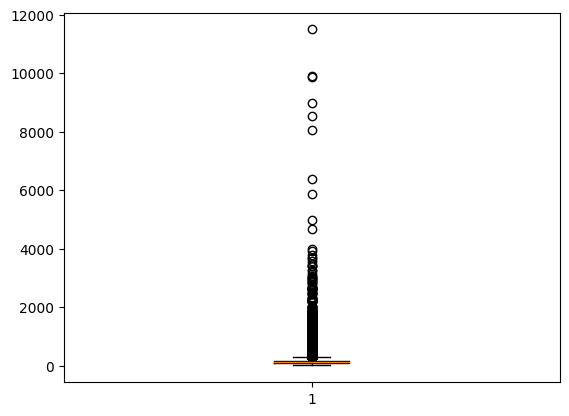

In [ ]:
import matplotlib.pyplot as plt

lens = total_data['joke'].str.len()
plt.boxplot(lens)
plt.show()

In [ ]:
print('Length max:', max(lens))
print('Length mean:', lens.mean())

Length max: 11498
Length mean: 141.17506917223886


In [ ]:
lens = list(lens)
lens.index(max(lens))

168753

In [ ]:
print(total_data['joke'].iloc[lens.index(max(lens))])

Призвали осенью 89-го. Направили в десантную учебку в Литву. Город Рукла. Там не доучился, потому что в Союзе начались беспорядки, решался вопрос о расформировании части, - досрочно присвоили младшего сержанта и отправили в Рязанский полк ВДВ. Несколько дней всего в полку пробыл, и кидают нас в Тбилиси. На аэродроме просидели два дня в ангарах. Потом в закрытых фургонах перевезли в строительную часть, где переодели в стройбатовскую форму. Там была какая-то заваруха. Каких-то заложников освобождали. Меня и ещё «молодых» под пули не отправили. «Вам ещё рано, - сказал взводный, - успеете». - и поставил нас в оцепление. Сам он и человек десять наших десантников полегли в этой операции. Весна 90-го это была, наверное. Черешни много было спелой и крупной.
А потом, уже на алычу, мы попали в Баку-2. Или нет…. Это надо альбом смотреть. 26 лет прошло, и как сказка все вспоминается. Приехали в Баку, - старшина договорился, что кормить нас будут в ресторане. И мы реально, как гражданские, приходил

In [ ]:
import numpy as np
print(np.percentile(lens, 90))
print(np.percentile(lens, 95))
print(np.percentile(lens, 99))

234.0
310.0
650.0


In [ ]:
total_data = total_data[total_data['joke'].str.len() < 512]
total_data.shape

(170289, 1)

In [ ]:
total_data.to_csv('total_data_jokes_512.csv', index=False)

In [ ]:
jokes = total_data['joke'].to_numpy()
jokes

array(['Только заметил, что слово "п@рно" набирается самими центральными клавишами. Как все продумано, блин!',
       'Друзья мои, чтобы соответствовать вам, я готов сделать над собой усилие и стать лучше. Но тогда и вы станьте немного хуже!',
       '- Люся, ты все еще хранишь мой подарок?\n- Да.\n- Я думал, ты выкинула все, что со мной связано.\n- Плюшевый мишка не виноват, что ты ебл@н...',
       ...,
       'Две старушки.\n- Никитична, у тебя какое минимальное подлётное время?\n- Туалет у нас на улице, в дальнем конце двора. Но, как тухлый беляш съем, то за три минуты долетаю.',
       '- Ты опять был у своей шлюхи?\n- Дорогая, надо быть толерантной.\n- Ладно не у шлюхи, а у женщины с низкой социальной ответственностью.',
       'Американский гангстер почувствовал приближение смерти. Он попросил прийти приятеля и продиктовал ему завещание.\n- А бриллиантовое колье стоимостью 100 тысяч долларов завещаю тебе, дорогой друг, - прошептал гангстер.\n- А где оно? - в волнении спросил при

In [ ]:
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
data_tok = [tokenizer.tokenize(x.lower()) for x in jokes]
data_tok[3]

['-',
 'а',
 'вот',
 'скажи',
 'честно',
 ',',
 'ты',
 'во',
 'сне',
 'храпишь',
 '?',
 '-',
 'понятие',
 'не',
 'имею',
 ',',
 'вроде',
 ',',
 'нет',
 '.',
 'от',
 'собственного',
 'храпа',
 'по',
 'крайней',
 'мере',
 'еще',
 'ни',
 'разу',
 'не',
 'просыпался',
 '.',
 '-',
 'ну',
 ',',
 'так',
 'у',
 'жены',
 'спроси',
 '.',
 '-',
 'а',
 'жена',
 'и',
 'подавно',
 'не',
 'знает',
 '.',
 'у',
 'нее',
 'странная',
 'привычка',
 'после',
 'замужества',
 'возникла',
 ':',
 'как',
 'спать',
 'ложится',
 '—',
 'беруши',
 'вставляет',
 '.']

In [ ]:
from collections import Counter

token_counts = Counter()

for row in data_tok:
    token_counts.update(row)

In [ ]:
print("Total unique tokens :", len(token_counts))
print("\n".join(map(str, token_counts.most_common(n=5))))
print("...")
print("\n".join(map(str, token_counts.most_common()[-3:])))

Total unique tokens : 164712
(',', 337873)
('-', 297927)
('.', 221324)
('?', 96380)
('в', 91904)
...
('долетаю', 1)
('продиктовал', 1)
('флоридской', 1)


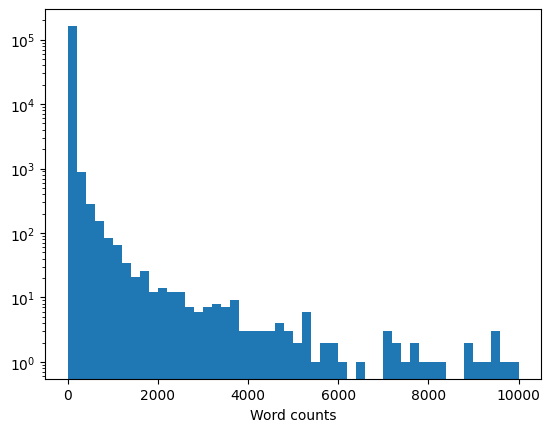

In [ ]:
plt.hist(list(token_counts.values()), range=[0, 10 ** 4], bins=50, log=True)
plt.xlabel("Word counts");

In [ ]:
words = token_counts.most_common(n=25)
words

[(',', 337873),
 ('-', 297927),
 ('.', 221324),
 ('?', 96380),
 ('в', 91904),
 ('!', 82606),
 ('и', 77861),
 ('не', 71856),
 (':', 65062),
 ('на', 59961),
 ('а', 59776),
 ('что', 58325),
 ('я', 51102),
 ('...', 37066),
 ('с', 36324),
 ('у', 36076),
 ('—', 31165),
 ('ты', 31073),
 ('это', 28583),
 ('как', 28553),
 ('"', 26098),
 ('то', 21333),
 ('вы', 20227),
 ('по', 17362),
 ('за', 16521)]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from string import punctuation

russian_stopwords = stopwords.words("russian")
tokens = []
for row in data_tok:
    row_tokens = []
    for token in row:
        if token not in russian_stopwords and token not in punctuation:
            row_tokens.append(token)
    tokens.append(row_tokens)
tokens[3]

['скажи',
 'честно',
 'сне',
 'храпишь',
 'понятие',
 'имею',
 'вроде',
 'собственного',
 'храпа',
 'крайней',
 'мере',
 'разу',
 'просыпался',
 'жены',
 'спроси',
 'жена',
 'подавно',
 'знает',
 'странная',
 'привычка',
 'замужества',
 'возникла',
 'спать',
 'ложится',
 '—',
 'беруши',
 'вставляет']

Total unique tokens : 164528
('...', 37066)
('—', 31165)
('это', 28583)
('почему', 9968)
('говорит', 8076)
...
('долетаю', 1)
('продиктовал', 1)
('флоридской', 1)


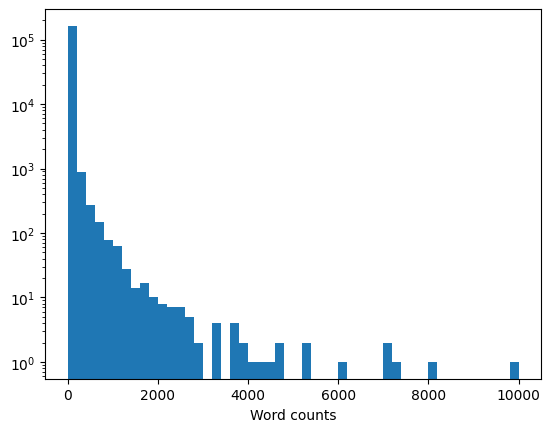

In [ ]:
token_counts = Counter()

for row in tokens:
    token_counts.update(row)

print("Total unique tokens :", len(token_counts))
print("\n".join(map(str, token_counts.most_common(n=5))))
print("...")
print("\n".join(map(str, token_counts.most_common()[-3:])))

plt.hist(list(token_counts.values()), range=[0, 10 ** 4], bins=50, log=True)
plt.xlabel("Word counts");

In [ ]:
top_25 = token_counts.most_common(n=25)
top_25

[('...', 37066),
 ('—', 31165),
 ('это', 28583),
 ('почему', 9968),
 ('говорит', 8076),
 ('жена', 7228),
 ('тебе', 7096),
 ('".', 7073),
 ('?!', 6092),
 ('спрашивает', 5242),
 ('муж', 5221),
 ('очень', 4725),
 ('мужик', 4672),
 ('просто', 4580),
 ('сегодня', 4293),
 ('время', 4013),
 ('девушка', 3872),
 ('день', 3814),
 ('доктор', 3789),
 ('лет', 3783),
 ('вчера', 3783),
 ('мама', 3774),
 ('человек', 3392),
 ('папа', 3351),
 ('сколько', 3262)]

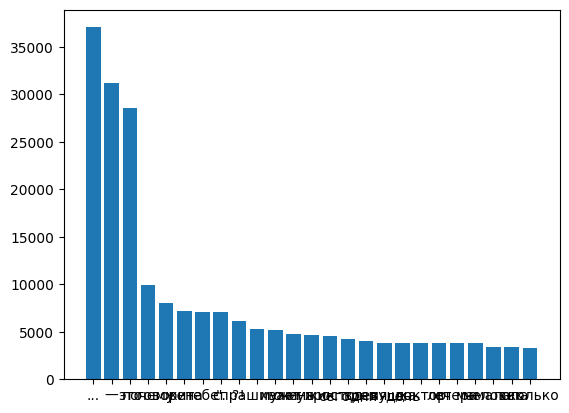

In [ ]:
words = [t[0] for t in top_25]
counts = [t[1] for t in top_25]

plt.bar(words, counts)
plt.show()

In [ ]:
word_lens = list(map(len, list(token_counts.keys())))
print('Word length max:', max(word_lens))
print('Word length mean:', sum(word_lens) / len(word_lens))

Word length max: 47
Word length mean: 8.527843285033551


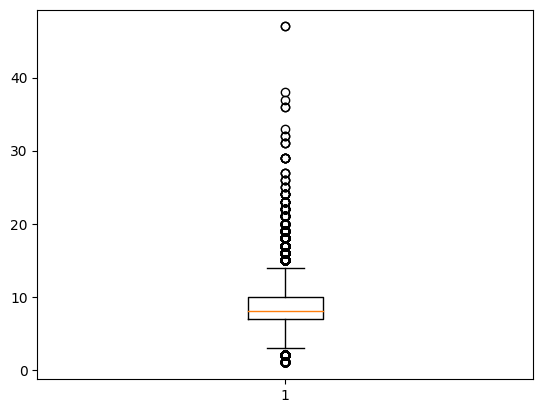

In [ ]:
plt.boxplot(word_lens)
plt.show()

In [ ]:
from nltk import ngrams

twograms_counts = Counter()
threegrams_counts = Counter()
for row in tokens:
    twograms = ngrams(row, 2)
    threegrams = ngrams(row, 3)
    twograms_counts.update(twograms)
    threegrams_counts.update(threegrams)

In [ ]:
print("Total unique twograms :", len(twograms_counts))
print("\n".join(map(str, twograms_counts.most_common(n=5))))
print("...")
print("\n".join(map(str, twograms_counts.most_common()[-3:])))

Total unique twograms : 1339906
(('—', 'это'), 5425)
(('молодой', 'человек'), 683)
(('...', 'это'), 616)
(('каждый', 'день'), 585)
(('новый', 'год'), 560)
...
(('влезешь', 'балкона'), 1)
(('балкона', 'слева'), 1)
(('слева', 'двери'), 1)


In [ ]:
top_25 = twograms_counts.most_common(n=25)
top_25

[(('—', 'это'), 5425),
 (('молодой', 'человек'), 683),
 (('...', 'это'), 616),
 (('каждый', 'день'), 585),
 (('новый', 'год'), 560),
 (('день', 'рождения'), 483),
 (('сих', 'пор'), 477),
 (('самом', 'деле'), 415),
 (('друг', 'друга'), 337),
 (('алло', 'это'), 337),
 (('новый', 'русский'), 317),
 (('это', 'значит'), 314),
 (('владимир', 'владимирович'), 312),
 (('жена', 'мужу'), 307),
 (('сколько', 'лет'), 290),
 (('это', 'просто'), 279),
 (('это', 'такое'), 277),
 (('жена', 'говорит'), 274),
 (('это', 'время'), 273),
 (('тех', 'пор'), 265),
 (('некоторое', 'время'), 262),
 (('приходит', 'домой'), 261),
 (('две', 'подруги'), 259),
 (('лет', 'назад'), 256),
 (('это', '—'), 251)]

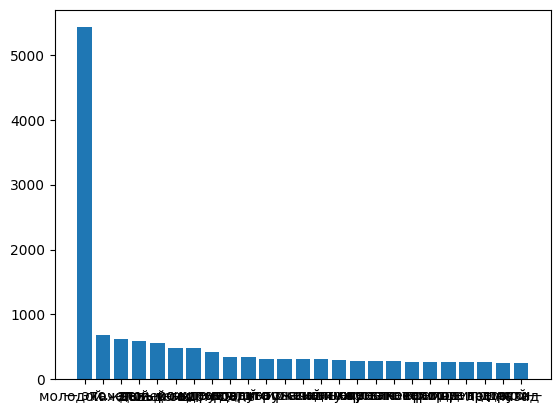

In [ ]:
words = [' '.join(t[0]) for t in top_25]
counts = [t[1] for t in top_25]

plt.bar(words, counts)
plt.show()

In [ ]:
print("Total unique twograms :", len(threegrams_counts))
print("\n".join(map(str, threegrams_counts.most_common(n=5))))
print("...")
print("\n".join(map(str, threegrams_counts.most_common()[-3:])))

Total unique twograms : 1581349
(('жена', 'говорит', 'мужу'), 145)
(('жена', '—', 'мужу'), 113)
(('жизнь', '—', 'это'), 107)
(('тех', 'пор', 'пока'), 100)
(('—', 'это', 'человек'), 91)
...
(('сейфе', 'влезешь', 'балкона'), 1)
(('влезешь', 'балкона', 'слева'), 1)
(('балкона', 'слева', 'двери'), 1)


In [ ]:
top_25 = threegrams_counts.most_common(n=25)
top_25

[(('жена', 'говорит', 'мужу'), 145),
 (('жена', '—', 'мужу'), 113),
 (('жизнь', '—', 'это'), 107),
 (('тех', 'пор', 'пока'), 100),
 (('—', 'это', 'человек'), 91),
 (('любовь', '—', 'это'), 71),
 (('это', 'человек', 'который'), 69),
 (('муж', 'говорит', 'жене'), 67),
 (('—', 'это', 'такая'), 64),
 (('вопрос', 'армянскому', 'радио'), 64),
 (('счастье', '—', 'это'), 58),
 (('—', 'это', 'просто'), 55),
 (('муж', 'приходит', 'домой'), 54),
 (('б', '%%%', 'ь'), 54),
 (('жена', 'спрашивает', 'мужа'), 53),
 (('встречаются', 'две', 'подруги'), 53),
 (('муж', '—', 'жене'), 51),
 (('спрашивает', 'отца', 'папа'), 51),
 (('3', 'часа', 'ночи'), 50),
 (('почему', 'сих', 'пор'), 50),
 (('новости', 'хорошая', 'плохая'), 49),
 (('ха', 'ха', 'ха'), 49),
 (('женщина', '—', 'это'), 48),
 (('первая', 'брачная', 'ночь'), 47),
 (('сколько', 'тебе', 'лет'), 46)]

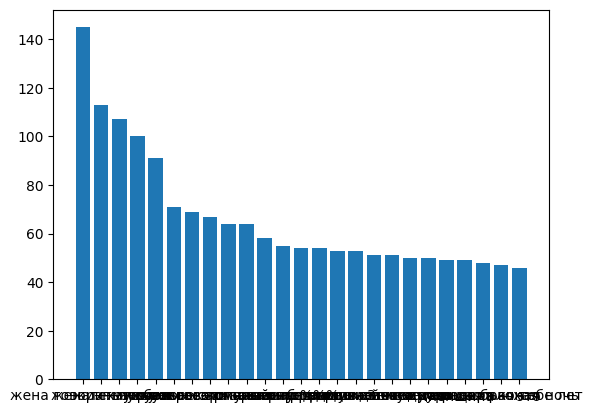

In [ ]:
words = [' '.join(t[0]) for t in top_25]
counts = [t[1] for t in top_25]

plt.bar(words, counts)
plt.show()

# Implicit ALS

In [ ]:
!pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 23.5 MB/s eta 0:00:00


In [ ]:
import implicit as im
import pandas as pd
import numpy as np

In [ ]:
ratings = pd.read_excel('FINAL jester 2006-15.xls', header=None, na_values=['99.0', '99', 99])
ratings.head(3)

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,62,99,99,99,99,0.21875,99,-9.28125,-9.28125,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34,99,99,99,99,-9.68750,99,9.93750,9.53125,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,99,99,99,99,-9.84375,99,-9.84375,-7.21875,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
jokes = pd.read_excel('Dataset3JokeSet.xlsx', header=None, names=['joke'])
jokes

,joke
0,"A man visits the doctor. The doctor says ""I ha..."
1,This couple had an excellent relationship goin...
2,Q. What's 200 feet long and has 4 teeth? A. ...
3,Q. What's the difference between a man and a t...
4,Q.\tWhat's O. J. Simpson's Internet address? ...
...,...
145,America: 8:00 - Welcome to work! 12:00 - Lunch...
146,It was the day of the big sale. Rumors of the ...
147,"Recently a teacher, a garbage collector, and a..."
148,"A little girl asked her father, ""Daddy? Do all..."


In [ ]:
ratings.replace(99, np.NaN, inplace=True)
ratings.drop(columns=[0], inplace=True)
ratings.head(3)

,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
0,NaN,NaN,NaN,NaN,0.21875,NaN,-9.28125,-9.28125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,-9.68750,NaN,9.93750,9.53125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,-9.84375,NaN,-9.84375,-7.21875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings.count().sum()

1842370

In [ ]:
rs = []
users = []
items = []

for item, content in ratings.items():
    for user, rating in content.items():
        if not pd.isna(rating):
            rs.append(rating)
            users.append(user)
            items.append(item)


In [ ]:
buf = pd.DataFrame({'rating': rs,
     'user': users,
     'item': items})
buf.head(3)

,rating,user,item
0,0.21875,0,5
1,-9.68750,1,5
2,-9.84375,2,5


In [ ]:
buf.shape

(1842370, 3)

In [ ]:
buf.to_csv('coo_matrix_df.csv', index=False)

In [ ]:
buf = pd.read_csv('coo_matrix_df.csv')
buf.shape

(1842370, 3)

In [ ]:
from implicit.evaluation import train_test_split
from scipy.sparse import coo_matrix

matrix = coo_matrix((buf.rating, (buf.user, buf.item)))
train, test = train_test_split(matrix, train_percentage = 0.8)

In [ ]:
from implicit.als import AlternatingLeastSquares

model = AlternatingLeastSquares(factors=64, regularization=0.05, alpha=2.0)
model.fit(train)

  0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
ids, scores= model.similar_items(113)

pd.DataFrame({"joke": jokes['joke'][ids], "score": scores})

,joke,score
113,Sherlock Holmes and Dr. Watson go on a camping...,1.000000
133,An artist asked the gallery owner if there had...,0.437307
147,"Recently a teacher, a garbage collector, and a...",0.399883
118,One day the first grade teacher was reading th...,0.346085
92,"Reaching the end of a job interview, the human...",0.269150
112,The new employee stood before the paper shredd...,0.263179
68,"This guys wife asks, ""Honey if I died would yo...",0.250547
59,What did the Buddhist say to the hot dog vendo...,0.173536
103,"As a pre-med student, I had to take a difficul...",0.163725
110,A new business was opening and one of the owne...,0.158910


In [ ]:
from implicit.evaluation import ranking_metrics_at_k

ranking_metrics_at_k(model, train, test, K = 1)

  0%|          | 0/44952 [00:00<?, ?it/s]

{'precision': 0.25137924897668623,
 'map': 0.25137924897668623,
 'ndcg': 0.25137924897668623,
 'auc': 0.5187003227089704}

# Word2Vec + поиск по cos sim

Без стоп-слов, лемматизации и стемминга

А токенизатор только по пробелам делит

In [ ]:
import pandas as pd
total_data = pd.read_csv('total_data_jokes_512.csv', encoding = "utf-8")
total_data

,joke
0,"Только заметил, что слово ""п@рно"" набирается с..."
1,"Друзья мои, чтобы соответствовать вам, я готов..."
2,"- Люся, ты все еще хранишь мой подарок?\n- Да...."
3,"- А вот скажи честно, ты во сне храпишь?\n- По..."
4,"Поссорилась с мужем. Пока он спал, я мысленно ..."
...,...
170284,- Мы на острове! Надо выбираться! Давайте пере...
170285,"- Здравствуйте, а где вход на нудистский пляж?..."
170286,"Две старушки.\n- Никитична, у тебя какое миним..."
170287,"- Ты опять был у своей шлюхи?\n- Дорогая, надо..."


In [ ]:
from nltk.tokenize import SpaceTokenizer

jokes = total_data['joke'].to_numpy()
tokenizer = SpaceTokenizer()
data_tok = [tokenizer.tokenize(x.lower()) for x in jokes]
data_tok[3]

['-',
 'а',
 'вот',
 'скажи',
 'честно,',
 'ты',
 'во',
 'сне',
 'храпишь?\n-',
 'понятие',
 'не',
 'имею,',
 'вроде,',
 'нет.',
 'от',
 'собственного',
 'храпа',
 'по',
 'крайней',
 'мере',
 'еще',
 'ни',
 'разу',
 'не',
 'просыпался.\n-',
 'ну,',
 'так',
 'у',
 'жены',
 'спроси.\n-',
 'а',
 'жена',
 'и',
 'подавно',
 'не',
 'знает.',
 'у',
 'нее',
 'странная',
 'привычка',
 'после',
 'замужества',
 'возникла:',
 'как',
 'спать',
 'ложится',
 '—',
 'беруши',
 'вставляет.']

In [ ]:
for i in range(len(data_tok)):
    data_tok[i] = data_tok[i] + ['PAD'] * (512 - len(data_tok[i]))

In [ ]:
len(data_tok[3])

512

In [ ]:
%%time

from gensim.models import Word2Vec
model = Word2Vec(data_tok[:100],
                 vector_size=32,
                 min_count=1,
                 workers=4,
                 window=5).wv

CPU times: user 743 ms, sys: 16.1 ms, total: 759 ms
Wall time: 757 ms


In [ ]:
import numpy as np
liked_jokes_idx = np.random.randint(100, size=5)
liked_jokes_idx

array([71, 62, 97, 82, 15])

In [ ]:
liked_jokes = []
for joke in liked_jokes_idx:
    liked_jokes.append(model[data_tok[joke]])
    print(total_data['joke'][joke])
    print(liked_jokes[-1].shape)
    print()

Один дед пользуется другим дедом, чтобы засудить Навального.
(512, 32)

Приснился сон: будто на дворе лето 2021 года, в мире бушует пандемия нового кишечного вируса, и мы все в памперсах обсуждаем, что в 2020 году в масках было лучше...
(512, 32)

В те далекие незапамятные времена, когда Земля была еще плоской, но уже вращалась...
(512, 32)

Подписался на закрытую группу "Почта России" в соцсети. Второй месяц жду одобрения на вступление...
(512, 32)

Люди, которые знают, как заработать миллионы на Форексе, но вместо этого обучающие этому за 300$ — вот мои настоящие герои.
(512, 32)



In [ ]:
print(model.most_similar(liked_jokes[0], topn=1))

[('PAD', 0.999999463558197)]


Без датасета и нормализации :)

И без PCA

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

class NearestNeighborForK:
    def __init__(self, data):
        self.data = data

    def predict(self, liked_jokes):
        distances = cosine_similarity(self.data, liked_jokes).sum(axis=1)
        print(distances.shape)
        nearest_index = np.argsort(distances)[:1]
        return self.data[nearest_index]

In [ ]:
%%time

clf = NearestNeighborForK(data_tok)
clf.predict(liked_jokes_idx)

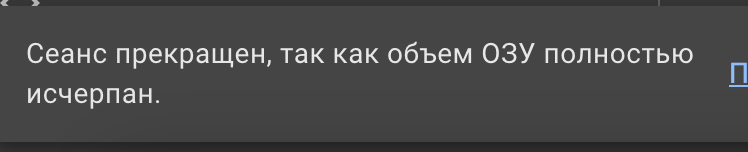

# Word2Vec + LogReg

In [ ]:
import pandas as pd

In [ ]:
total_data = pd.read_excel('Dataset3JokeSet.xlsx', header=None, names=['joke'])
total_data

,joke
0,"A man visits the doctor. The doctor says ""I ha..."
1,This couple had an excellent relationship goin...
2,Q. What's 200 feet long and has 4 teeth? A. ...
3,Q. What's the difference between a man and a t...
4,Q.\tWhat's O. J. Simpson's Internet address? ...
...,...
145,America: 8:00 - Welcome to work! 12:00 - Lunch...
146,It was the day of the big sale. Rumors of the ...
147,"Recently a teacher, a garbage collector, and a..."
148,"A little girl asked her father, ""Daddy? Do all..."


In [ ]:
from nltk.tokenize import NLTKWordTokenizer

jokes = total_data['joke'].to_numpy()
tokenizer = NLTKWordTokenizer()
data_tok = [tokenizer.tokenize(x.lower()) for x in jokes]
data_tok[3]

['q.',
 'what',
 "'s",
 'the',
 'difference',
 'between',
 'a',
 'man',
 'and',
 'a',
 'toilet',
 '?',
 'a.',
 'a',
 'toilet',
 'does',
 "n't",
 'follow',
 'you',
 'around',
 'after',
 'you',
 'use',
 'it',
 '.']

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
from nltk.corpus import stopwords
from string import punctuation

russian_stopwords = stopwords.words("english")
tokens = []
for row in data_tok:
    row_tokens = []
    for token in row:
        if token not in russian_stopwords and token not in punctuation:
            row_tokens.append(lemmatizer.lemmatize(token))
    tokens.append(row_tokens)
tokens[3]

['q.',
 "'s",
 'difference',
 'man',
 'toilet',
 'a.',
 'toilet',
 "n't",
 'follow',
 'around',
 'use']

In [ ]:
from collections import Counter
from tqdm import tqdm as tqdm

token_counts = Counter()
for text in tokens:
  token_counts.update(text)

list_of_tokens = [token for token, count in token_counts.items()]

In [ ]:
UNK, PAD = "UNK", "PAD"
list_of_tokens = [UNK, PAD] + sorted(list_of_tokens)

In [ ]:
import numpy as np

token_to_id = {token: idx for idx, token in enumerate(list_of_tokens)}
UNK_IX, PAD_IX = map(token_to_id.get, [UNK, PAD])

max_len = min(max(map(len, tokens)), 512 or float("inf"))

matrix = np.full((len(tokens), max_len), np.int32(PAD_IX))
for i, seq in enumerate(tokens):
    row_ix = [token_to_id.get(word, UNK_IX) for word in seq[:max_len]]
    matrix[i, : len(row_ix)] = row_ix
matrix

array([[1263, 2146,  631, ...,    1,    1,    1],
       [ 522,  735, 1660, ...,    1,    1,    1],
       [1607,   17,   50, ...,    1,    1,    1],
       ...,
       [1645, 2009,  878, ...,    1,    1,    1],
       [1216,  895,  204, ...,    1,    1,    1],
       [1082,  559, 1188, ...,    1,    1,    1]], dtype=int32)

In [ ]:
buf = pd.read_csv('coo_matrix_df.csv')
buf.shape

(1842370, 3)

In [ ]:
max_len

147

In [ ]:
data = []
for index, row in buf.iterrows():
    data.append(np.append(matrix[int(row['item']) - 1], [row['user']]))

data

[array([1.607e+03, 1.700e+01, 1.414e+03, 1.096e+03, 1.842e+03, 1.700e+01,
        1.078e+03, 1.050e+02, 9.200e+01, 1.859e+03, 1.859e+03, 2.470e+02,
        1.859e+03, 1.859e+03, 7.140e+02, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+0

In [ ]:
from sklearn.model_selection import train_test_split

y = buf['rating']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=115)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([-0.73173288,  1.80412877,  3.53741086, ..., -1.21364227,
        1.67598241,  2.88443994])

In [ ]:
y_test

67057      0.28125
938205    -4.68750
1084063   -8.84375
1069690    2.93750
1508863    3.75000
            ...   
1136434    8.50000
477401    -7.06250
272118    -6.21875
1616799   -4.25000
971556     1.12500
Name: rating, Length: 368474, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, y_pred)
score

4.1091366203684085

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.08713983812056625

# SentBert

In [1]:
import pandas as pd

total_data = pd.read_excel('Dataset3JokeSet.xlsx', header=None, names=['joke'])
total_data

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset3JokeSet.xlsx'

In [2]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 1.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sentence_transformers import SentenceTransformer

jokes = total_data['joke'].to_numpy()
model = SentenceTransformer('bert-base-nli-mean-tokens')
vectors = model.encode(jokes)
vectors[3]

array([ 6.34474993e-01,  1.54406631e+00,  1.32418454e+00,  5.92691489e-02,
       -5.86741753e-02,  6.76794350e-01,  2.61838055e+00,  2.90949851e-01,
        3.47734988e-01, -1.58448577e-01, -1.64281368e+00, -1.20287657e-01,
        3.50211054e-01,  3.53955358e-01,  1.83012769e-01,  2.21933186e-01,
        5.45278788e-01, -2.52821505e-01,  4.19584125e-01, -2.60032892e-01,
       -8.28392565e-01,  3.32787156e-01,  1.12808846e-01, -4.23287004e-01,
        5.60633421e-01, -1.97890401e-01, -2.86441743e-01,  4.90198672e-01,
       -1.69512689e+00, -3.68114531e-01,  5.84787846e-01,  1.01230311e+00,
        2.33923510e-01, -2.64370829e-01,  6.69910431e-01,  2.64455080e-02,
        3.56503159e-01, -4.03753281e-01,  2.79659957e-01,  1.02997020e-01,
       -6.84087455e-01,  1.19275546e+00,  4.74404097e-01, -6.80026650e-01,
        3.97099227e-01, -6.58043548e-02,  2.87939620e+00, -6.95752680e-01,
        1.38290510e-01, -1.63076714e-01,  5.00128031e-01, -9.15669603e-04,
        1.53540456e+00,  

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

weights = pd.DataFrame(cosine_similarity(vectors))

In [ ]:
similarities = weights.iloc[113].values
print(jokes[113])
similar_indices = np.argsort(-similarities)[1:2]
similar_jokes = jokes[similar_indices]
similar_jokes

Sherlock Holmes and Dr. Watson go on a camping trip, set up their tent, and fall asleep. Some hours later, Holmes wakes his faithful friend. "Watson, look up at the sky and tell me what you see." Watson replies, "I see millions of stars." "What does that tell you?" Watson ponders for a minute. "Astronomically speaking, it tells me that there are millions of galaxies and potentially billions of planets. Astrologically, it tells me that Saturn is in Leo. Timewise, it appears to be approximately a quarter past three. Theologically, it's evident the Lord is all-powerful and we are small and insignificant. Meteorologically, it seems we will have a beautiful day tomorrow. What does it tell you?" Holmes is silent for a moment, then speaks. "Watson, you idiot, someone has stolen our tent."


array(['A man and Cindy Crawford get stranded on a desert island.  After a couple of days they fall in love and start sleeping together.  Time pass the man seems frustrated, Cindy asks if there is anything she can do?  He says there is one thing, "Could you put on this baseball cap and go to the other side of the island and answer me when I call you Bob?"  She agrees.  Next day he is walking on the other side of the island, runs into her and says "Hi Bob!"   She says "Hello, what\'s up?"   He replies: "Bob you won\'t believe it: I\'ve been sleeping with Cindy Crawford for the past two weeks!!!!"'],
      dtype=object)

# BERT

In [ ]:
import pandas as pd

total_data = pd.read_excel('Dataset3JokeSet.xlsx', header=None, names=['joke'])
total_data

,joke
0,"A man visits the doctor. The doctor says ""I ha..."
1,This couple had an excellent relationship goin...
2,Q. What's 200 feet long and has 4 teeth? A. ...
3,Q. What's the difference between a man and a t...
4,Q.\tWhat's O. J. Simpson's Internet address? ...
...,...
145,America: 8:00 - Welcome to work! 12:00 - Lunch...
146,It was the day of the big sale. Rumors of the ...
147,"Recently a teacher, a garbage collector, and a..."
148,"A little girl asked her father, ""Daddy? Do all..."


In [ ]:
from transformers import BertModel, BertTokenizer

bert_version = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(bert_version)
model = BertModel.from_pretrained(bert_version)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
model = model.eval()
jokes = list(total_data['joke'])

In [ ]:
import torch

encodings = tokenizer(
    jokes,
    padding=True,
    return_tensors='pt'
)

with torch.no_grad():
    embeds = model(**encodings)

embeds[0][3]

tensor([[-0.1059,  0.2210, -0.2899,  ..., -0.3094,  0.3613,  1.0185],
        [ 0.5749,  0.1496, -0.5676,  ...,  0.0015,  0.5656,  0.5554],
        [-0.7826, -0.1800, -0.3380,  ...,  0.6337,  0.2021, -0.2062],
        ...,
        [ 0.0358, -0.6019, -0.0748,  ...,  0.4221,  0.1370, -0.0370],
        [ 0.3388, -0.1369,  0.1377,  ..., -0.0464,  0.1551,  0.0372],
        [ 0.3700, -0.1555,  0.1545,  ...,  0.0884,  0.2285,  0.0480]])

In [ ]:
cls = embeds[0][:, 0, :]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

weights = pd.DataFrame(cosine_similarity(cls))

In [ ]:
import numpy as np

similarities = weights.iloc[113].values
print(jokes[113])
similar_indices = np.argsort(-similarities)[1:2][0]
similar_jokes = jokes[similar_indices]
similar_jokes

Sherlock Holmes and Dr. Watson go on a camping trip, set up their tent, and fall asleep. Some hours later, Holmes wakes his faithful friend. "Watson, look up at the sky and tell me what you see." Watson replies, "I see millions of stars." "What does that tell you?" Watson ponders for a minute. "Astronomically speaking, it tells me that there are millions of galaxies and potentially billions of planets. Astrologically, it tells me that Saturn is in Leo. Timewise, it appears to be approximately a quarter past three. Theologically, it's evident the Lord is all-powerful and we are small and insignificant. Meteorologically, it seems we will have a beautiful day tomorrow. What does it tell you?" Holmes is silent for a moment, then speaks. "Watson, you idiot, someone has stolen our tent."


'A man piloting a hot air balloon discovers he has wandered off course and is hopelessly lost. He descends to a lower altitude and locates a man down on the ground. He lowers the balloon further and shouts "Excuse me, can you tell me where I am?"  The man below says: "Yes, you\'re in a hot air balloon, about 30 feet above this field."  "You must work in Information Technology," says the balloonist.  "Yes I do," replies the man. "And how did you know that?"  "Well," says the balloonist, "what you told me is technically correct, but of no use to anyone."  The man below says, "You must work in management."  "I do," replies the balloonist, "how did you know?"  "Well," says the man, "you don\'t know where you are, or where you\'re going, but you expect my immediate help. You\'re in the same position you were before we met, but now it\'s my fault!"'

#TF-IDF

In [ ]:
import pandas as pd

total_data = pd.read_excel('Dataset3JokeSet.xlsx', header=None, names=['joke'])
total_data

,joke
0,"A man visits the doctor. The doctor says ""I ha..."
1,This couple had an excellent relationship goin...
2,Q. What's 200 feet long and has 4 teeth? A. ...
3,Q. What's the difference between a man and a t...
4,Q.\tWhat's O. J. Simpson's Internet address? ...
...,...
145,America: 8:00 - Welcome to work! 12:00 - Lunch...
146,It was the day of the big sale. Rumors of the ...
147,"Recently a teacher, a garbage collector, and a..."
148,"A little girl asked her father, ""Daddy? Do all..."


In [ ]:
from nltk.tokenize import NLTKWordTokenizer

jokes = total_data['joke'].to_numpy()
tokenizer = NLTKWordTokenizer()
data_tok = [tokenizer.tokenize(x.lower()) for x in jokes]
data_tok[3]

['q.',
 'what',
 "'s",
 'the',
 'difference',
 'between',
 'a',
 'man',
 'and',
 'a',
 'toilet',
 '?',
 'a.',
 'a',
 'toilet',
 'does',
 "n't",
 'follow',
 'you',
 'around',
 'after',
 'you',
 'use',
 'it',
 '.']

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from string import punctuation

russian_stopwords = stopwords.words("english")
tokens = []
for row in data_tok:
    row_tokens = []
    for token in row:
        if token not in russian_stopwords and token not in punctuation:
            row_tokens.append(token)
    tokens.append(' '.join(row_tokens))
tokens[3]

"q. 's difference man toilet a. toilet n't follow around use"

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,2), min_df=2)
tfidf_array = tf_idf.fit_transform(tokens)
weights = pd.DataFrame(cosine_similarity(tfidf_array))

In [ ]:
similarities = weights.iloc[113].values
print(jokes[113])
similar_indices = np.argsort(-similarities)[1:2]
similar_jokes = jokes[similar_indices]
similar_jokes

Sherlock Holmes and Dr. Watson go on a camping trip, set up their tent, and fall asleep. Some hours later, Holmes wakes his faithful friend. "Watson, look up at the sky and tell me what you see." Watson replies, "I see millions of stars." "What does that tell you?" Watson ponders for a minute. "Astronomically speaking, it tells me that there are millions of galaxies and potentially billions of planets. Astrologically, it tells me that Saturn is in Leo. Timewise, it appears to be approximately a quarter past three. Theologically, it's evident the Lord is all-powerful and we are small and insignificant. Meteorologically, it seems we will have a beautiful day tomorrow. What does it tell you?" Holmes is silent for a moment, then speaks. "Watson, you idiot, someone has stolen our tent."


array(["Nurse: Doctor, Doctor, there's an invisible man in the waiting room! Doctor: Well, go in there and tell him that I can't see him!"],
      dtype=object)

# Implicit CosineRecommender

In [ ]:
!pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 16.4 MB/s eta 0:00:00


In [ ]:
import implicit as im
import pandas as pd
import numpy as np

buf = pd.read_csv('coo_matrix_df.csv')
buf.shape

(1842370, 3)

In [ ]:
total_data = pd.read_excel('Dataset3JokeSet.xlsx', header=None, names=['joke'])
jokes = total_data['joke']

In [ ]:
from implicit.evaluation import train_test_split
from scipy.sparse import coo_matrix

matrix = coo_matrix((buf.rating, (buf.user, buf.item)))
train, test = train_test_split(matrix, train_percentage = 0.8)

In [ ]:
from implicit.nearest_neighbours import CosineRecommender

model = CosineRecommender(K=7)
model.fit(train)

/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.04250288009643555 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

In [ ]:
ids, scores= model.similar_items(113)

pd.DataFrame({"joke": jokes[ids], "score": scores})

,joke,score
113,Sherlock Holmes and Dr. Watson go on a camping...,1.000000
147,"Recently a teacher, a garbage collector, and a...",0.342458
133,An artist asked the gallery owner if there had...,0.337364
92,"Reaching the end of a job interview, the human...",0.335195
112,The new employee stood before the paper shredd...,0.329927
118,One day the first grade teacher was reading th...,0.322153
110,A new business was opening and one of the owne...,0.291781


In [ ]:
from implicit.evaluation import ranking_metrics_at_k

ranking_metrics_at_k(model, train, test, K = 1)

  0%|          | 0/44932 [00:00<?, ?it/s]

{'precision': 0.4315187394284697,
 'map': 0.4315187394284697,
 'ndcg': 0.4315187394284697,
 'auc': 0.5585353615529645}

Чем больше K при обучении, тем выше метрики, но для совсем большого падает

In [ ]:
precision = 0
prec = 1
k = 2
while prec > precision:
    model = CosineRecommender(K=k)
    model.fit(train)
    m = ranking_metrics_at_k(model, train, test, K = 1)
    print(k)
    print(m)
    prec = m['precision']
    k += 1

/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.016266584396362305 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/44932 [00:00<?, ?it/s]

2
{'precision': 0.3954642570996172, 'map': 0.3954642570996172, 'ndcg': 0.3954642570996172, 'auc': 0.5542889934185736}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.012308120727539062 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/44932 [00:00<?, ?it/s]

3
{'precision': 0.42969375945873767, 'map': 0.42969375945873767, 'ndcg': 0.42969375945873767, 'auc': 0.5633286396907146}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.012400627136230469 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/44932 [00:00<?, ?it/s]

4
{'precision': 0.43029466749755185, 'map': 0.43029466749755185, 'ndcg': 0.43029466749755185, 'auc': 0.5602070926356768}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.010603904724121094 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/44932 [00:00<?, ?it/s]

5
{'precision': 0.4308065521232084, 'map': 0.4308065521232084, 'ndcg': 0.4308065521232084, 'auc': 0.5596209659456528}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.01262521743774414 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/44932 [00:00<?, ?it/s]

6
{'precision': 0.43294311403899227, 'map': 0.43294311403899227, 'ndcg': 0.43294311403899227, 'auc': 0.5594748047284159}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.010283470153808594 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/44932 [00:00<?, ?it/s]

7
{'precision': 0.4315187394284697, 'map': 0.4315187394284697, 'ndcg': 0.4315187394284697, 'auc': 0.5585353615529645}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.009990930557250977 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/44932 [00:00<?, ?it/s]

8
{'precision': 0.42708982462387607, 'map': 0.42708982462387607, 'ndcg': 0.42708982462387607, 'auc': 0.5566727235522417}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.010433197021484375 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/44932 [00:00<?, ?it/s]

9
{'precision': 0.42234932787323065, 'map': 0.42234932787323065, 'ndcg': 0.42234932787323065, 'auc': 0.5554006936111205}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.010497093200683594 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/44932 [00:00<?, ?it/s]

10
{'precision': 0.4141591738627259, 'map': 0.4141591738627259, 'ndcg': 0.4141591738627259, 'auc': 0.5539090696744582}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.011851072311401367 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/44932 [00:00<?, ?it/s]

11
{'precision': 0.40652541618445653, 'map': 0.40652541618445653, 'ndcg': 0.40652541618445653, 'auc': 0.5525473988144943}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.010963201522827148 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/44932 [00:00<?, ?it/s]

12
{'precision': 0.4030535030713078, 'map': 0.4030535030713078, 'ndcg': 0.4030535030713078, 'auc': 0.5517249413719456}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.012104511260986328 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/44932 [00:00<?, ?it/s]

13
{'precision': 0.4004718240897356, 'map': 0.4004718240897356, 'ndcg': 0.4004718240897356, 'auc': 0.5511741394295506}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.010281562805175781 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/44932 [00:00<?, ?it/s]

14
{'precision': 0.397222469509481, 'map': 0.397222469509481, 'ndcg': 0.397222469509481, 'auc': 0.5504968867405532}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.012335777282714844 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/44932 [00:00<?, ?it/s]

KeyboardInterrupt: 

Оптимальное получилось 6

# Implicit TFIDFRecommender

In [ ]:
!pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 16.4 MB/s eta 0:00:00


In [ ]:
import implicit as im
import pandas as pd
import numpy as np

buf = pd.read_csv('coo_matrix_df.csv')
buf.shape

(1842370, 3)

In [ ]:
total_data = pd.read_excel('Dataset3JokeSet.xlsx', header=None, names=['joke'])
jokes = total_data['joke']

In [ ]:
from implicit.evaluation import train_test_split
from scipy.sparse import coo_matrix

matrix = coo_matrix((buf.rating, (buf.user, buf.item)))
train, test = train_test_split(matrix, train_percentage = 0.8)

In [ ]:
from implicit.nearest_neighbours import TFIDFRecommender

model = TFIDFRecommender(K=500)
model.fit(train)

/usr/local/lib/python3.10/dist-packages/implicit/nearest_neighbours.py:225: RuntimeWarning: invalid value encountered in sqrt
  X.data = sqrt(X.data) * idf[X.col]
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.012500524520874023 seconds
  warnings.warn(


  0%|          | 0/151 [00:00<?, ?it/s]

In [ ]:
ids, scores= model.similar_items(113)

pd.DataFrame({"joke": jokes[ids - 1], "score": scores})

,joke,score
149,"In an interview with David Letterman, Carter p...",NaN
53,"The Pope dies and, naturally, goes to heaven. ...",NaN
59,What did the Buddhist say to the hot dog vendo...,NaN
58,The Chukcha (Russian Eskimo) phones up the Rus...,NaN
57,How many teddybears does it take to change a l...,NaN
56,Why are there so many Jones's in the phone boo...,NaN
55,A man and Cindy Crawford get stranded on a des...,NaN
54,"A woman has twins, and gives them up for adopt...",NaN
52,One Sunday morning William burst into the livi...,NaN
61,A group of managers were given the assignment...,NaN


In [ ]:
from implicit.evaluation import ranking_metrics_at_k

ranking_metrics_at_k(model, train, test, K = 1)

  0%|          | 0/44933 [00:00<?, ?it/s]

{'precision': 0.06589811497117931,
 'map': 0.06589811497117931,
 'ndcg': 0.06589811497117931,
 'auc': 0.5028784123059608}

# SentBERT + Faiss

In [14]:
!pip install faiss-сpu

ERROR: Invalid requirement: 'faiss-сpu'


In [13]:
import pandas as pd

total_data = pd.read_csv('total_data_jokes_512.csv', encoding = "utf-8")
total_data

,joke
0,"Только заметил, что слово ""п@рно"" набирается с..."
1,"Друзья мои, чтобы соответствовать вам, я готов..."
2,"- Люся, ты все еще хранишь мой подарок?\n- Да...."
3,"- А вот скажи честно, ты во сне храпишь?\n- По..."
4,"Поссорилась с мужем. Пока он спал, я мысленно ..."
...,...
170284,- Мы на острове! Надо выбираться! Давайте пере...
170285,"- Здравствуйте, а где вход на нудистский пляж?..."
170286,"Две старушки.\n- Никитична, у тебя какое миним..."
170287,"- Ты опять был у своей шлюхи?\n- Дорогая, надо..."
